<a href="https://colab.research.google.com/github/lima-breno/sampling_models/blob/main/SM_06_correlacao_regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CORRELAÇÃO E REGRESSÃO LINEAR SIMPLES**

# **Análise e Tratamento dos Dados**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
mola = pd.read_csv('rigidez.csv',
                    sep=';', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

**Objetivo: Analisar a correlação entre a força e a deformação sofrida por uma mola e criar um modelo de regressão linear.**

Visualizando as primeiras linhas

In [ ]:
mola.head()

,cargas,forca,Lo,L,x,K
0,1,0.10,27.0,29.90,0.0029,34.48
1,2,0.15,27.0,31.30,0.0043,34.88
2,3,0.18,27.0,NaN,NaN,NaN
3,4,0.23,27.0,34.00,0.0070,32.86
4,5,0.31,27.0,35.53,0.0085,36.34


Dimensão dos dados

In [ ]:
mola.shape

(30, 6)

Dicionário de Variáveis:
- Cargas:
- Força: Força que a carga exerce na mola
- Lo: Cumpriemnto inicial
- L: Cumprimento final
- x: Deformação após a força
- K: Constante elástica ou rigidez = força / deformação

Para facilitar a compreensão vamos renomear para ficar claro

In [ ]:
mola.rename(columns={'Lo': 'compr_inicial','L': 'compr_final','x': 'deformacao', 'K': 'rigidez'}, inplace=True)

In [ ]:
mola.head()

,cargas,forca,compr_inicial,compr_final,deformacao,rigidez
0,1,0.10,27.0,29.90,0.0029,34.48
1,2,0.15,27.0,31.30,0.0043,34.88
2,3,0.18,27.0,NaN,NaN,NaN
3,4,0.23,27.0,34.00,0.0070,32.86
4,5,0.31,27.0,35.53,0.0085,36.34


Análise do tipo de variáveis

In [ ]:
mola.dtypes

,0
cargas,int64
forca,float64
compr_inicial,float64
compr_final,float64
deformacao,float64
rigidez,float64


In [ ]:
# Excluir variável
dados_1 = mola.drop(columns=['compr_inicial'])
dados_1.head()

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.0029,34.48
1,2,0.15,31.30,0.0043,34.88
2,3,0.18,NaN,NaN,NaN
3,4,0.23,34.00,0.0070,32.86
4,5,0.31,35.53,0.0085,36.34


Valores Missing (NAN) - Valores faltantes

In [ ]:
dados_1.isnull().sum()

,0
cargas,0
forca,0
compr_final,1
deformacao,1
rigidez,1


Temos que realizar tratamento para valores faltantes.



*   Excluir a observação que contém valores faltantes
*   Substituir os valores faltantes por alguma medida de tendencia central



In [ ]:
dados_1 = dados_1.dropna()

In [ ]:
dados_1.head()

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.0029,34.48
1,2,0.15,31.30,0.0043,34.88
3,4,0.23,34.00,0.0070,32.86
4,5,0.31,35.53,0.0085,36.34
5,6,0.45,41.40,0.0144,31.25


In [ ]:
dados_1.describe()

,cargas,forca,compr_final,deformacao,rigidez
count,29.000000,29.000000,29.000000,29.000000,29.000000
mean,15.931034,1.565172,139.050690,0.112050,30.823448
std,8.631053,0.961567,343.474372,0.343475,5.840459
min,1.000000,0.100000,29.900000,0.002900,1.640000
25%,9.000000,0.720000,50.000000,0.023000,30.770000
50%,16.000000,1.550000,76.400000,0.049400,31.300000
75%,23.000000,2.250000,99.740000,0.072740,32.860000
max,30.000000,3.200000,1918.000000,1.891000,36.340000


Criando novamente a base de dados com valores ausentes novamente

In [ ]:
dados_2 = mola.drop(columns=['compr_inicial'])

Substituindo pela mediana

In [ ]:
dados_2['compr_final'].fillna(dados_2['compr_final'].median(), inplace=True)
dados_2['deformacao'].fillna(dados_2['deformacao'].median(), inplace=True)
dados_2['rigidez'].fillna(dados_2['rigidez'].median(), inplace=True)

<ipython-input-14-0f0e7d82ec96>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_2['compr_final'].fillna(dados_2['compr_final'].median(), inplace=True)
<ipython-input-14-0f0e7d82ec96>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [ ]:
dados_2.head()

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.0029,34.48
1,2,0.15,31.30,0.0043,34.88
2,3,0.18,76.40,0.0494,31.30
3,4,0.23,34.00,0.0070,32.86
4,5,0.31,35.53,0.0085,36.34


Criando novamente a base de dados com valores ausentes novamente

In [ ]:
dados_3 = mola.drop(columns=['compr_inicial'])

Substituindo pela média

In [ ]:
dados_3['compr_final'].fillna(dados_3['compr_final'].mean(), inplace=True)
dados_3['deformacao'].fillna(dados_3['deformacao'].mean(), inplace=True)
dados_3['rigidez'].fillna(dados_3['rigidez'].mean(), inplace=True)

<ipython-input-17-fe0046b0df70>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_3['compr_final'].fillna(dados_3['compr_final'].mean(), inplace=True)
<ipython-input-17-fe0046b0df70>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

Análise dos outliers

In [ ]:
import plotly.express as px

In [ ]:
boxplot = px.box(dados_1, y="forca")
boxplot.show()

In [ ]:
boxplot = px.box(dados_1, y="deformacao")
boxplot.show()

In [ ]:
dados_1.head(30)

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.00290,34.48
1,2,0.15,31.30,0.00430,34.88
3,4,0.23,34.00,0.00700,32.86
4,5,0.31,35.53,0.00850,36.34
5,6,0.45,41.40,0.01440,31.25
6,7,0.55,44.20,0.01720,31.98
7,8,0.68,47.20,0.02020,33.66
8,9,0.72,50.00,0.02300,31.30
9,10,0.83,51.90,0.02490,33.33
10,11,1.05,58.00,0.03100,33.87


In [ ]:
boxplot = px.box(dados_1, y="rigidez")
boxplot.show()

In [ ]:
dados_1.head(30)

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.00290,34.48
1,2,0.15,31.30,0.00430,34.88
3,4,0.23,34.00,0.00700,32.86
4,5,0.31,35.53,0.00850,36.34
5,6,0.45,41.40,0.01440,31.25
6,7,0.55,44.20,0.01720,31.98
7,8,0.68,47.20,0.02020,33.66
8,9,0.72,50.00,0.02300,31.30
9,10,0.83,51.90,0.02490,33.33
10,11,1.05,58.00,0.03100,33.87


In [ ]:
dados_1.drop(28, inplace=True)

In [ ]:
dados_1.head(30)

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.00290,34.48
1,2,0.15,31.30,0.00430,34.88
3,4,0.23,34.00,0.00700,32.86
4,5,0.31,35.53,0.00850,36.34
5,6,0.45,41.40,0.01440,31.25
6,7,0.55,44.20,0.01720,31.98
7,8,0.68,47.20,0.02020,33.66
8,9,0.72,50.00,0.02300,31.30
9,10,0.83,51.90,0.02490,33.33
10,11,1.05,58.00,0.03100,33.87


# **ANÁLISE DA CORRELAÇÃO LINEAR**

In [ ]:
import matplotlib.pyplot as plt

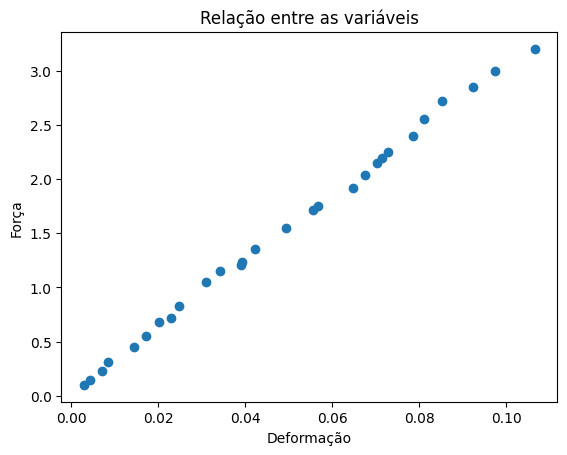

In [ ]:
plt.scatter(dados_1.deformacao,dados_1.forca)
plt.title('Relação entre as variáveis')
plt.xlabel('Deformação')
plt.ylabel('Força')
plt.grid(False)
plt.show()

## Análise da Normalidade

Gráfico QQ-Plot

In [ ]:
import scipy.stats as stats

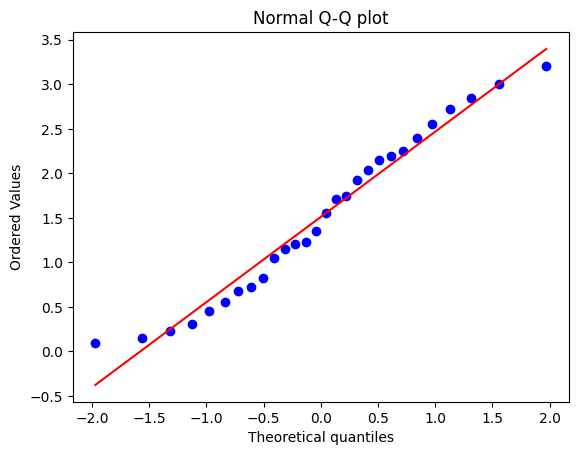

In [ ]:
stats.probplot(dados_1['forca'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

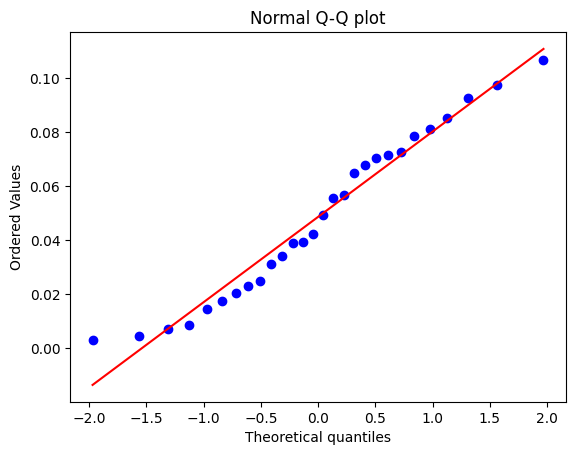

In [ ]:
stats.probplot(dados_1['deformacao'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

Teste Shapiro-Wilk

Ho = distribuição normal : p > 0.05

Ha = distribuição não é normal : p <= 0.05

In [ ]:
stats.shapiro(dados_1.forca)

ShapiroResult(statistic=0.9576826086744047, pvalue=0.3068305488869675)

In [ ]:
estatistica, p = stats.shapiro(dados_1.forca)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9576826086744047
p-valor: 0.3068305488869675


In [ ]:
estatistica, p = stats.shapiro(dados_1.deformacao)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9549090441807988
p-valor: 0.26253245011218


Teste Lilliefors (Kolmogorov_Sminorv)

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(dados_1.forca, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.08874943686913472
p-valor: 0.8198097045523484


In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(dados_1.deformacao, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.09983434637432431
p-valor: 0.6675380103986344


## Correlação Linear

Pearson (distribuição normal)

Spearman (distribuição não normal)

Kendall (distribuição não normal com quantidade pequena de amostras)

Ho = não há corrrelação linear: p > 0,05

Ha = existe correlação linear: p <= 0,05

In [ ]:
# Pearson
coef,p = stats.pearsonr(dados_1.deformacao,dados_1.forca)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.9990785169672951
p-valor: 4.36288535226053e-37


In [ ]:
# Spearman
coef,p = stats.spearmanr(dados_1.deformacao,dados_1.forca)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.9999999999999998
p-valor: 4.0494065550148204e-201


In [ ]:
# Kendall
coef,p = stats.kendalltau(dados_1.deformacao,dados_1.forca)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 1.0
p-valor: 6.559778474139676e-30


In [ ]:
correlacoes = dados_1.corr(method ='pearson')
correlacoes

,cargas,forca,compr_final,deformacao,rigidez
cargas,1.000000,0.997073,0.995672,0.995670,-0.728749
forca,0.997073,1.000000,0.999079,0.999079,-0.713098
compr_final,0.995672,0.999079,1.000000,1.000000,-0.730160
deformacao,0.995670,0.999079,1.000000,1.000000,-0.730224
rigidez,-0.728749,-0.713098,-0.730160,-0.730224,1.000000


In [ ]:
import seaborn as sns

<Axes: >

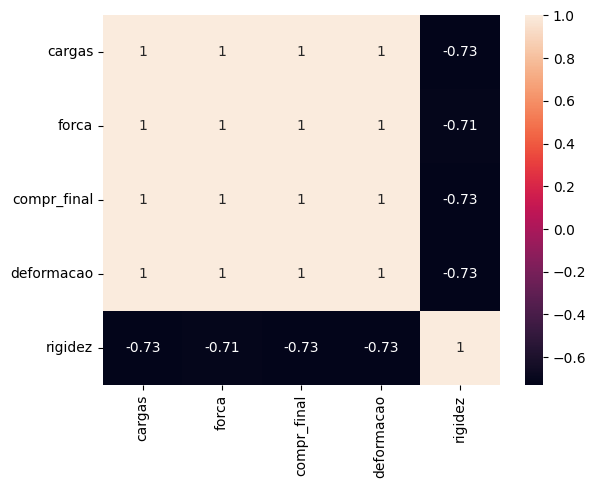

In [ ]:
plt.figure()
sns.heatmap(correlacoes, annot= True)

# **MODELO DE REGRESSÃO LINEAR**

## Regressão Linear com Statsmodels

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [ ]:
# Criação do modelo
regressao = smf.ols('forca ~ deformacao', data = dados_1).fit()

In [ ]:
residuos = regressao.resid
residuos

,0
0,-0.031277
1,-0.023602
3,-0.025230
4,0.009421
5,-0.028951
6,-0.013603
7,0.025700
8,-0.018951
9,0.033607
10,0.069188


### 1º Pressuposto - Teste de Normalidade dos resíduos

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
estatistica, p = stats.shapiro(residuos)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9599487886133787
p-valor: 0.3477001951200734


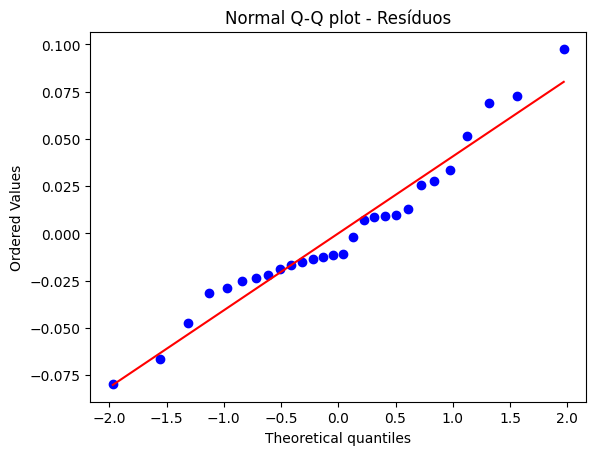

In [ ]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

### 2º Pressuposto : Análise da Homocedasticidade dos resíduos

Os dados são homocedásticos quando tem variação constante

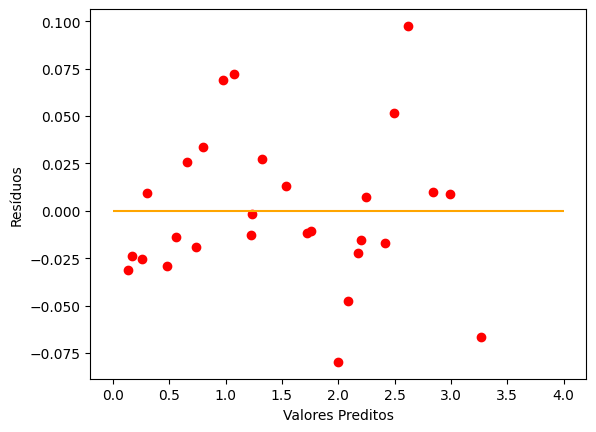

In [ ]:
plt.scatter(y=residuos, x=regressao.predict(), color='red')
plt.hlines(y=0, xmin=0, xmax=4, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Teste Breusch-Pagan (Homocedasticidade ou heterocedasticidade)

Ho = existe homocedasticidade : p > 0.05

Ha = não existe homocedasticidade : p <= 0.05

In [ ]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [ ]:
estatistica, p, f, fp = sms.het_breuschpagan (regressao.resid, regressao.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística de teste: 1.9571121097946222
p-valor: 0.16182251015029236
f-valor: 1.9538891028209564
f_p-valor: 0.17398144365103868


### **Outliers nos resíduos**

No teste de outliers os valores devem estar dentro do intervalo 3 e -3

In [ ]:
outliers = regressao.outlier_test()

In [ ]:
outliers.max()

,0
student_resid,2.823202
unadj_p,0.966231
bonf(p),1.000000


In [ ]:
outliers.min()

,0
student_resid,-2.132762
unadj_p,0.009195
bonf(p),0.257448


**Modelo Verificado**

### **Regressão Linear**

In [ ]:
regressao.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  forca   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.409e+04
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           4.36e-37
Time:                        22:34:38   Log-Likelihood:                 50.909
No. Observations:                  28   AIC:                            -97.82
Df Residuals:                      26   BIC:                            -95.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0436      0.015      2.994      0.006       0.014       0.074
deformacao    30.2326      0.255    118.694      0.000      29.709      30.756
==============================================================================
Omnibus:                        2.234   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.327   Jarque-Bera (JB):                1.221
Skew:                           0.493   Prob(JB):                        0.543
Kurtosis:                       3.273   Cond. No.                         33.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Estatística t:

Ho = coeficiente igual a zero : p > 0,05 (coeficiente não validado)

Ha = coeficiente diferente de zero: p <= 0,05 (coeficiente validado)

**Equação: Força = 0,0436 + 30,2326.deformação**

**R^2 ajustado = 0,998**

In [ ]:
coefs = pd.DataFrame(regressao.params)
coefs.columns = ['Coeficientes']
print(coefs)

            Coeficientes
Intercept       0.043602
deformacao     30.232571


In [ ]:
regressao.params

,0
Intercept,0.043602
deformacao,30.232571


In [ ]:
dados_1.head()

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.0029,34.48
1,2,0.15,31.30,0.0043,34.88
3,4,0.23,34.00,0.0070,32.86
4,5,0.31,35.53,0.0085,36.34
5,6,0.45,41.40,0.0144,31.25


In [ ]:
regressao.predict()

array([0.13127682, 0.17360242, 0.25523036, 0.30057922, 0.47895139,
       0.56360259, 0.6543003 , 0.7389515 , 0.79639338, 0.98081207,
       1.07755629, 1.22267264, 1.23174241, 1.32244012, 1.53709137,
       1.72151006, 1.7608124 , 1.99964971, 2.08732417, 2.17197536,
       2.20523119, 2.24271958, 2.41685919, 2.49848713, 2.62244067,
       2.84011518, 2.99127804, 3.26639443])

<ipython-input-59-bc7618fee14a>:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



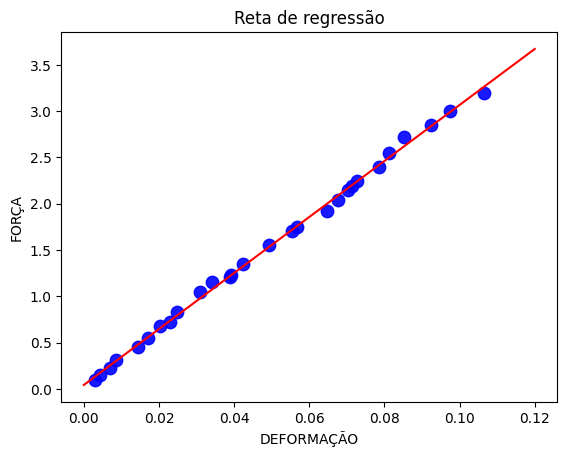

In [ ]:
plt.scatter(y=dados_1.forca, x=dados_1.deformacao, color='blue', s=80, alpha=0.9)
X_plot = np.linspace(0, 0.12)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('FORÇA')
plt.xlabel('DEFORMAÇÃO')
plt.show()

## Regressão Linear com Sklearn

In [ ]:
dados_1.head()

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.0029,34.48
1,2,0.15,31.30,0.0043,34.88
3,4,0.23,34.00,0.0070,32.86
4,5,0.31,35.53,0.0085,36.34
5,6,0.45,41.40,0.0144,31.25


In [ ]:
x = dados_1.iloc[ : , 3].values
y = dados_1.iloc[ : , 1].values

In [ ]:
correlacao2 = np.corrcoef (x, y)
correlacao2

array([[1.        , 0.99907852],
       [0.99907852, 1.        ]])

In [ ]:
x

array([0.0029 , 0.0043 , 0.007  , 0.0085 , 0.0144 , 0.0172 , 0.0202 ,
       0.023  , 0.0249 , 0.031  , 0.0342 , 0.039  , 0.0393 , 0.0423 ,
       0.0494 , 0.0555 , 0.0568 , 0.0647 , 0.0676 , 0.0704 , 0.0715 ,
       0.07274, 0.0785 , 0.0812 , 0.0853 , 0.0925 , 0.0975 , 0.1066 ])

In [ ]:
x = x.reshape(-1,1) #transformando em matriz

In [ ]:
x

array([[0.0029 ],
       [0.0043 ],
       [0.007  ],
       [0.0085 ],
       [0.0144 ],
       [0.0172 ],
       [0.0202 ],
       [0.023  ],
       [0.0249 ],
       [0.031  ],
       [0.0342 ],
       [0.039  ],
       [0.0393 ],
       [0.0423 ],
       [0.0494 ],
       [0.0555 ],
       [0.0568 ],
       [0.0647 ],
       [0.0676 ],
       [0.0704 ],
       [0.0715 ],
       [0.07274],
       [0.0785 ],
       [0.0812 ],
       [0.0853 ],
       [0.0925 ],
       [0.0975 ],
       [0.1066 ]])

In [ ]:
from sklearn.linear_model import LinearRegression
regressao2 = LinearRegression()
regressao2.fit(x,y)

LinearRegression()

In [ ]:
regressao2.intercept_

0.04360236653479488

In [ ]:
regressao2.coef_

array([30.23257099])

In [ ]:
# coeficiente de determinação
regressao2.score(x,y)

0.9981578830655694

**Equação: Força = 0,0436 + 30,2326.deformação**

**R^2 ajustado = 0,998**

In [ ]:
dados_1.head(20)

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.0029,34.48
1,2,0.15,31.30,0.0043,34.88
3,4,0.23,34.00,0.0070,32.86
4,5,0.31,35.53,0.0085,36.34
5,6,0.45,41.40,0.0144,31.25
6,7,0.55,44.20,0.0172,31.98
7,8,0.68,47.20,0.0202,33.66
8,9,0.72,50.00,0.0230,31.30
9,10,0.83,51.90,0.0249,33.33
10,11,1.05,58.00,0.0310,33.87


In [ ]:
previsoes = regressao2.predict(x)
previsoes

array([0.13127682, 0.17360242, 0.25523036, 0.30057922, 0.47895139,
       0.56360259, 0.6543003 , 0.7389515 , 0.79639338, 0.98081207,
       1.07755629, 1.22267264, 1.23174241, 1.32244012, 1.53709137,
       1.72151006, 1.7608124 , 1.99964971, 2.08732417, 2.17197536,
       2.20523119, 2.24271958, 2.41685919, 2.49848713, 2.62244067,
       2.84011518, 2.99127804, 3.26639443])

In [ ]:
previsao = regressao2.predict([[0.45]])
print('A força deve ser de {} N'.format(previsao))

A força deve ser de [13.64825931] N
